## Logistic Regression model

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [2]:
# Import our dataset for the lung cancer survey in our notebook and load the table
data = pd.read_csv("dataset.csv")
data.head()

,GENDER,AGE,SMOKING,YELLOW FINGERS,ANXIETY,PEER PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,DIAGNOSIS
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [3]:
# Get information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  DIAGNOSIS              

<Axes: >

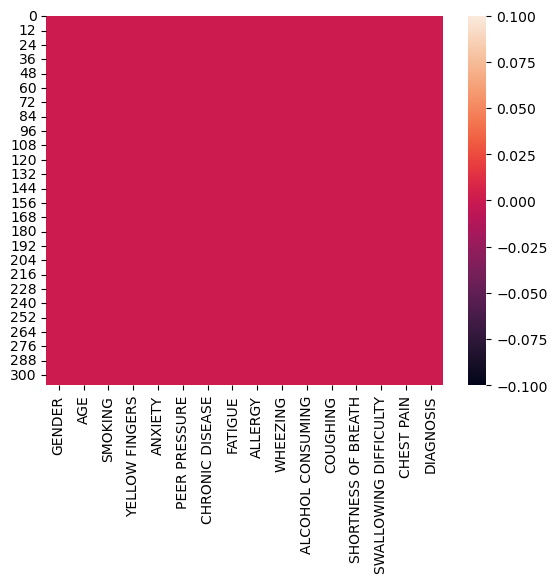

In [4]:
# Cleaning the dataset in order to remove any empty column if there is any by plotting a heatmap
sns.heatmap(data.isnull())

In [5]:
# Remove unwanted columns from our dataset
data = data.drop(["GENDER", "AGE"], axis=1)
data.head()

,SMOKING,YELLOW FINGERS,ANXIETY,PEER PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,DIAGNOSIS
0,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [6]:
# Divide the dataset into predictors and target variable

# Predictors
X = data.drop(["DIAGNOSIS"], axis=1)

# Target variable
y = data["DIAGNOSIS"] 

## Divide data into training and testing parts

In [7]:
# In this case we will be testing on 30% of the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## Training the model

In [8]:
# Create the logistic regression model
lr = LogisticRegression()

# Train the model on the training data
lr.fit(X_train, y_train)

# predict the target variable based on the test data
y_pred = lr.predict(X_test)

# Computing the accuracy score
lr.score(X_test, y_test)

0.978494623655914

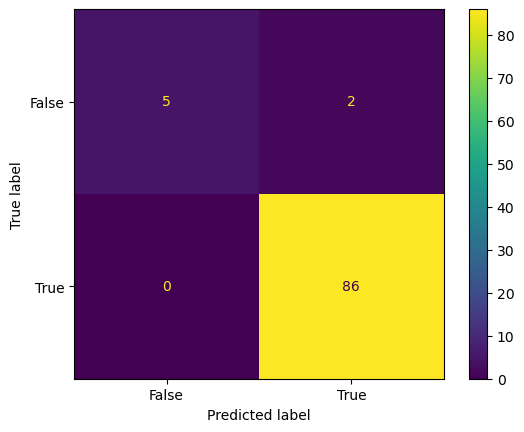

In [9]:
# generate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [False, True])

cm_display.plot()
plt.show()

## Evaluation of the model

In [10]:
accuracy_lr1 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_lr1: .2f}")

Accuracy:  0.98


In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.98      1.00      0.99        86

    accuracy                           0.98        93
   macro avg       0.99      0.86      0.91        93
weighted avg       0.98      0.98      0.98        93



## SVM model

In [12]:
# Create the SVM model
svm = SVC()

# Train the model on the training data
svm.fit(X_train, y_train)

# predict the target variable based on the test data
y_pred = svm.predict(X_test)

# Computing the accuracy score
svm.score(X_test, y_test)

0.967741935483871

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.98      0.99      0.98        86

    accuracy                           0.97        93
   macro avg       0.91      0.85      0.88        93
weighted avg       0.97      0.97      0.97        93



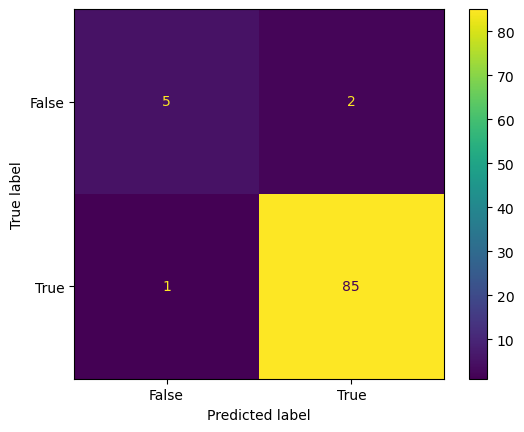

In [14]:
# generate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [False, True])

cm_display.plot()
plt.show()

In [15]:
accuracy_svm1 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_svm1: .2f}")

Accuracy:  0.97


## Comparison with 60:40 split of the dataset

In [16]:
# In this case we will be testing on 40% of the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

## Logistic Regression

In [17]:
# Train the model on the training data
lr.fit(X_train, y_train)

# predict the target variable based on the test data
y_pred = lr.predict(X_test)

# Computing the accuracy score
lr.score(X_test, y_test)

0.9516129032258065

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.55      0.67        11
           1       0.96      0.99      0.97       113

    accuracy                           0.95       124
   macro avg       0.91      0.77      0.82       124
weighted avg       0.95      0.95      0.95       124



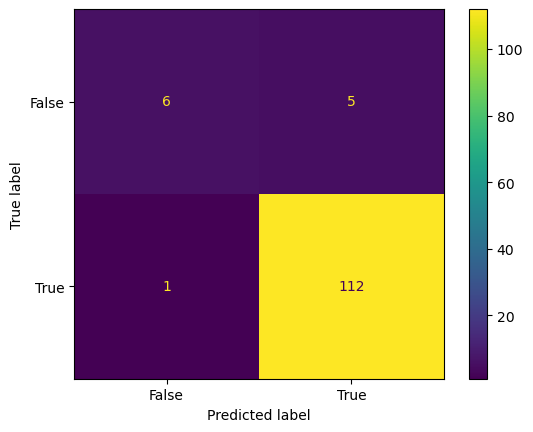

In [19]:
# generate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [False, True])

cm_display.plot()
plt.show()

In [20]:
accuracy_lr2 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_lr2: .2f}")

Accuracy:  0.95


## SVM 

In [21]:
# Train the model on the training data
svm.fit(X_train, y_train)

# predict the target variable based on the test data
y_pred = svm.predict(X_test)

# Computing the accuracy score
svm.score(X_test, y_test)

0.9596774193548387

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.64      0.74        11
           1       0.97      0.99      0.98       113

    accuracy                           0.96       124
   macro avg       0.92      0.81      0.86       124
weighted avg       0.96      0.96      0.96       124



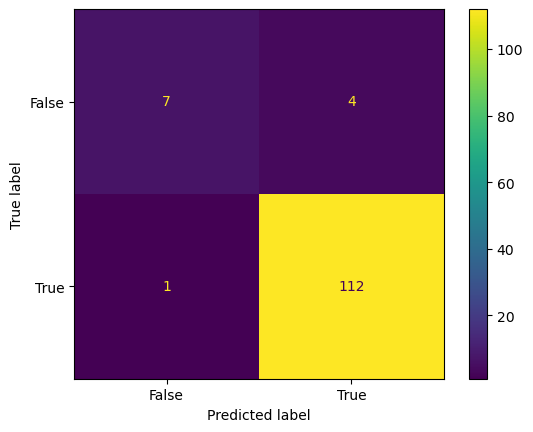

In [23]:
# generate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [False, True])

cm_display.plot()
plt.show()

In [24]:
accuracy_svm2 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_svm2: .2f}")

Accuracy:  0.96


## 80:20 split of the dataset

In [25]:
# In this case we will be testing on 20% of the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

## Logistic Regression

In [26]:
# Train the model on the training data
lr.fit(X_train, y_train)

# predict the target variable based on the test data
y_pred = lr.predict(X_test)

# Computing the accuracy score
lr.score(X_test, y_test)

0.9516129032258065

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.55      0.67        11
           1       0.96      0.99      0.97       113

    accuracy                           0.95       124
   macro avg       0.91      0.77      0.82       124
weighted avg       0.95      0.95      0.95       124



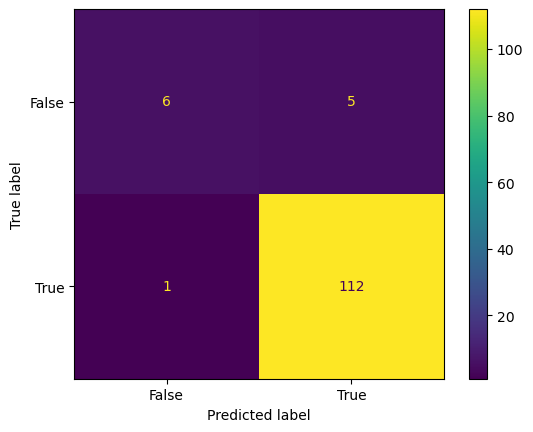

In [28]:
# generate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [False, True])

cm_display.plot()
plt.show()

In [29]:
accuracy_lr3 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_lr3: .2f}")

Accuracy:  0.95


## SVM

In [30]:
# Train the model on the training data
svm.fit(X_train, y_train)

# predict the target variable based on the test data
y_pred = svm.predict(X_test)

# Computing the accuracy score
svm.score(X_test, y_test)

0.9596774193548387

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.64      0.74        11
           1       0.97      0.99      0.98       113

    accuracy                           0.96       124
   macro avg       0.92      0.81      0.86       124
weighted avg       0.96      0.96      0.96       124



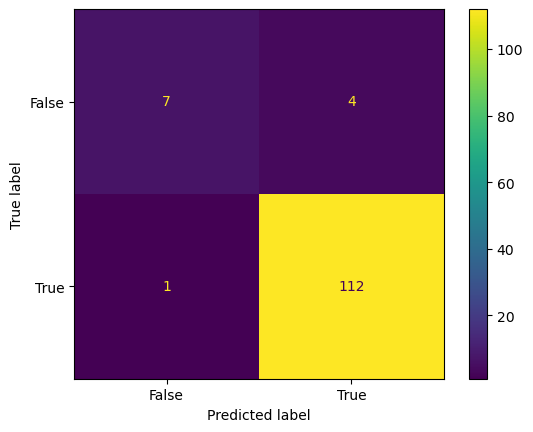

In [32]:
# generate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [False, True])

cm_display.plot()
plt.show()

In [33]:
accuracy_svm3 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_svm3: .2f}")

Accuracy:  0.96


## Comparing the results for the 2 splits

In [34]:
# Comparing the performance accuracry for the Logistic Regression model

print(f"Accuracy LR 70:30: {accuracy_lr1: .2f}")
print(f"Accuracy LR 60:40: {accuracy_lr2: .2f}")
print(f"Accuracy LR 80:20: {accuracy_lr3: .2f}")

Accuracy LR 70:30:  0.98
Accuracy LR 60:40:  0.95
Accuracy LR 80:20:  0.95


In [35]:
# Comparing the performance accuracy for the SVm model

print(f"Accuracy SVM 70:30: {accuracy_svm1: .2f}")
print(f"Accuracy SVM 60:40: {accuracy_svm2: .2f}")
print(f"Accuracy SVM 80:20: {accuracy_svm3: .2f}")

Accuracy SVM 70:30:  0.97
Accuracy SVM 60:40:  0.96
Accuracy SVM 80:20:  0.96
